Testing OCPC module: implement a MCPC (Multi-Class classifier) based on Principal Curves and visualize principal curves for 2D dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from ocpc_py import MultiClassPC

Creating a 2D dataset for training and visualization

To visualize the principal curves on a graph, it is necessary to have a 2D dataset. 

In [2]:
x = np.linspace(-2, 2, num=101)
media_ruido = 0; 
var_ruido = 0.5
ruido = media_ruido + (var_ruido * np.random.randn(x.shape[0]))
y = x**2 + ruido

x = x[:,np.newaxis]; y = y[:,np.newaxis]
c1 = np.concatenate((x,y), axis = 1)
c1_out =  np.zeros((c1.shape[0], 1))

xx = x + 2 
yy = -y + 6
c2 = np.concatenate((xx,yy), axis = 1)
c2_out = np.ones((c2.shape[0], 1))

Showing dataset

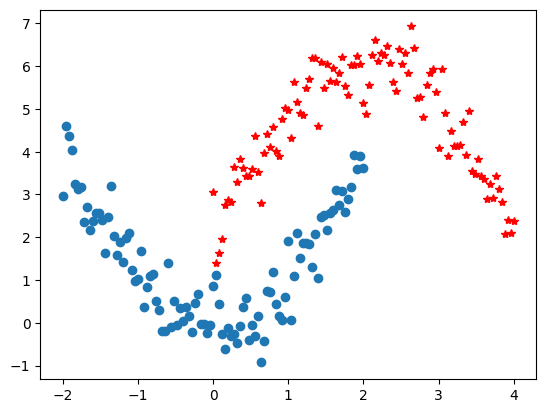

In [3]:
plt.figure()
plt.plot(c1[:,0], c1[:,1], 'o')
plt.plot(c2[:,0], c2[:,1], 'r*')

Training model with the 2D dataset

In [4]:
X = np.concatenate((c1, c2), axis = 0)
Y = np.concatenate((c1_out, c2_out), axis = 0)

clf = MultiClassPC(f=0.8)
clf.fit(X,Y.flatten())

Showing the principal curves with dataset information

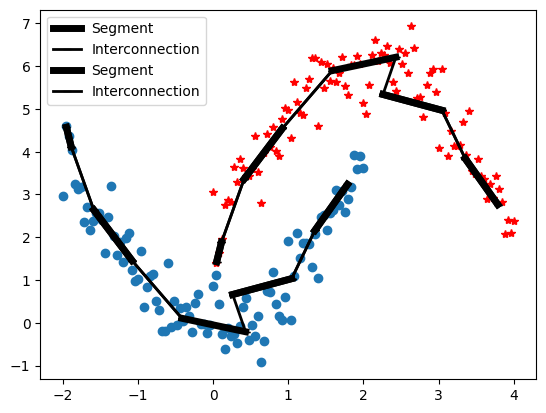

In [5]:
curves_ = clf.curves

fig, ax = plt.subplots()
ax.plot(c1[:,0], c1[:,1], 'o')
ax.plot(c2[:,0], c2[:,1], 'r*')
curves_[0].plot_curve(ax)
curves_[1].plot_curve(ax)

plt.show()